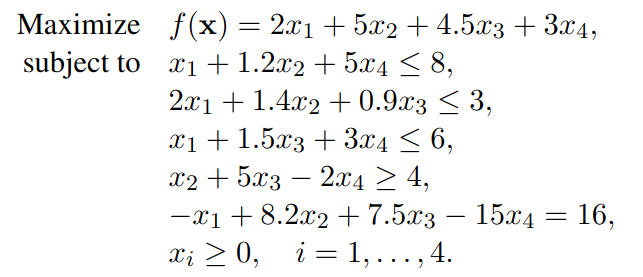

# Linprog

Without integer constraint

$$

min(f(x)=c^Tx) \\

subject\ to: \\

A_{ineq} x \le b_{ineq} \\

A_{eq} x = b_{eq} \\

where: \\

bnd[0,:] \le x \le bnd[1,:]

$$


In [1]:
import numpy as np
from scipy.optimize import linprog

obj = -1*np.array([2,5,4.5,3])

A_ineq = [[1, 1.2, 0, 5],
          [2, 1.4, 0.9, 0],
          [1, 0, 1.5, 3],
          [0, -1, -5, 2]]

b_ineq = [8, 3, 6, -4]

A_eq = [[-1, 8.2, 7.5, -15]]

b_eq = [16]

bnd = [(0, float('inf')),
       (0, float('inf')),
       (0, float('inf')),
       (0, float('inf')),]

linprog(c=obj, A_ub=A_ineq, b_ub=b_ineq,
               A_eq=A_eq, b_eq=b_eq,
               bounds=bnd,
               method="revised simplex")

/tmp/ipykernel_24248/2314723839.py:22: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  linprog(c=obj, A_ub=A_ineq, b_ub=b_ineq,


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -16.088105726872243
       x: [ 0.000e+00  2.643e-01  2.922e+00  5.389e-01]
     nit: 4

## MILP

$$

min(f(x)=c^Tx) \\

subject\ to: \\

b_{l} \le A x \le b_{u} \\

optional: \\

x \in \mathbb{Z} \\

$$


Now with integer constraints. Note how the equality constraint is made from two inequality constraints.

In [2]:
import numpy as np
from scipy.optimize import milp,LinearConstraint,Bounds

c = -1*np.array([2,5,4.5,3])

A = np.array([[1, 1.2, 0, 5],
              [2, 1.4, 0.9, 0],
              [1, 0, 1.5, 3],
              [0, -1, -5, 2],
              [-1, 8.2, 7.5, -15]])

b_l = np.array([-np.inf, -np.inf, -np.inf, -np.inf, 16])
b_u = np.array([8, 3, 6, -4, 16])

constraints = LinearConstraint(A, b_l, b_u)

l = np.array([0,0,0,0])
u = np.array([np.inf,np.inf,np.inf,np.inf])

bnd = Bounds(l,u)

milp(c=c, constraints=constraints, bounds=bnd)#, integrality=np.ones_like(c))

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -16.088105726872246
              x: [ 0.000e+00  2.643e-01  2.922e+00  5.389e-01]
 mip_node_count: None
 mip_dual_bound: None
        mip_gap: None